In [3]:
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_csv("./Dataset/claims_data.csv")
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


In [7]:
obese_count = df[df["bmi"] > 25]["bmi"].count()
total = df.shape[0]
(obese_count/total)*100

81.53961136023916

In [18]:
descriptive_stats = df.describe().T
descriptive_stats["var"] = df.describe().T[["std"]].apply(lambda std: std*std)
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,var
age,1338.0,39.207025,14.049960,18.00,27.00000,39.000000,51.000000,64.00000,1.974014e+02
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.400000,34.693750,53.13000,3.718788e+01
steps,1338.0,5328.623318,2453.643236,3000.00,3008.00000,4007.000000,8004.000000,10010.00000,6.020365e+06
children,1338.0,1.094918,1.205493,0.00,0.00000,1.000000,2.000000,5.00000,1.453213e+00
claim_amount,1338.0,9611.312287,13450.624483,0.00,0.00000,2748.484475,13045.979513,63770.42801,1.809193e+08


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   steps            1338 non-null   int64  
 4   children         1338 non-null   int64  
 5   smoker           1338 non-null   object 
 6   region           1338 non-null   object 
 7   insurance_claim  1338 non-null   object 
 8   claim_amount     1338 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


In [23]:
df["rounded_age"] = df["age"].apply(lambda age: 60 if age > 60 else age)

In [24]:
df[["rounded_age", "age"]]

,rounded_age,age
0,19,19
1,18,18
2,28,28
3,33,33
4,32,32
...,...,...
1333,50,50
1334,18,18
1335,18,18
1336,21,21


In [26]:
aged = df[df["age"] > 59]["age"].count()
display(aged)
rounded_aged = df[df["rounded_age"] > 59]["rounded_age"].count()
display(rounded_aged)

114

114

In [27]:
from seaborn import jointplot

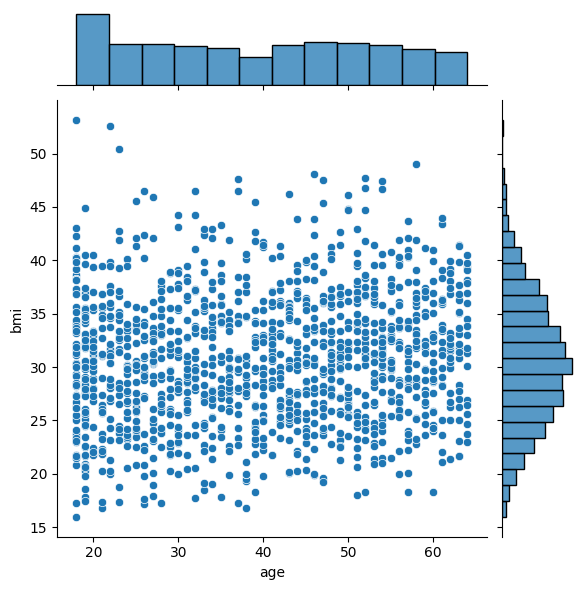

In [29]:
jointplot(df,x=df["age"],y=df["bmi"])


In [32]:
df.corr(numeric_only=True)[["age", "bmi"]]

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000
steps,-0.167957,-0.681149
children,0.042469,0.012759
claim_amount,0.218863,0.293001
rounded_age,0.998962,0.107768


In [50]:
claims = pd.read_csv("./Dataset/claims_data.csv")
# labels (target variable)
y = claims[['insurance_claim']]

# independent features
X = claims.drop(['insurance_claim',"claim_amount"], axis=1)

In [72]:
# Transform categorical Features
X_transformed = pd.get_dummies(X, drop_first=True)
display(X_transformed)
from sklearn.preprocessing import OrdinalEncoder
y_transformed = OrdinalEncoder().fit_transform(y)
display(y_transformed)
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # OneHotEncoder doest work find out why

# # Transform categorical Features
# X_transformed = OneHotEncoder(drop="first").fit_transform(X)
# display(X_transformed)

# y_transformed = OrdinalEncoder().fit_transform(y)
# display(y_transformed.ravel())

,age,bmi,steps,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,3009,0,False,True,False,False,True
1,18,33.770,3008,1,True,False,False,True,False
2,28,33.000,3009,3,True,False,False,True,False
3,33,22.705,10009,0,True,False,True,False,False
4,32,28.880,8010,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,4008,3,True,False,True,False,False
1334,18,31.920,3003,0,False,False,False,False,False
1335,18,36.850,3008,0,False,False,False,True,False
1336,21,25.800,8009,0,False,False,False,False,True


array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed.ravel()
                                                    , test_size=0.33, random_state=42)

In [75]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [76]:
display(y)
y_transformed

,insurance_claim
0,yes
1,yes
2,no
3,no
4,yes
...,...
1333,no
1334,yes
1335,yes
1336,no


array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr.predict(X_test),target_names=["claims", "no_claims"]))

              precision    recall  f1-score   support

      claims       0.83      0.86      0.84       181
   no_claims       0.90      0.88      0.89       261

    accuracy                           0.87       442
   macro avg       0.87      0.87      0.87       442
weighted avg       0.87      0.87      0.87       442



In [90]:
import statsmodels.api as sm

# Add a constant (intercept) to the feature matrices
X_train_const = sm.add_constant(X_train.values)
X_test_const = sm.add_constant(X_test.values)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_const)
#result = model.fit()

# Print the summary of the model
#print(result.summary())

# Make predictions on the test set
#y_pred_prob = result.predict(X_test_const)
#print(classification_report(y_test,y_pred_prob,target_names=["claims", "no_claims"]))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [96]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [97]:
from sklearn.metrics import confusion_matrix
labels = ['0: claim', '1: no_claim']

pd.DataFrame(data=confusion_matrix(y_test, forest.predict(X_test)), index=labels, columns=labels)

,0: claim,1: no_claim
0: claim,176,5
1: no_claim,8,253


In [99]:
print(classification_report(y_test,forest.predict(X_test),target_names=["claims", "no_claims"]))

              precision    recall  f1-score   support

      claims       0.96      0.97      0.96       181
   no_claims       0.98      0.97      0.97       261

    accuracy                           0.97       442
   macro avg       0.97      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear',)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("\n\nThe accuracy score of the SVC(linear) is:", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("\n\nThe accuracy score of the SVC(sigmoid) is:", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("\n\nThe accuracy score of the SVC(rbf) is:", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))



The accuracy score of the SVC(linear) is: 0.8484162895927602
Classification Report:

               precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       181
         1.0       0.92      0.82      0.86       261

    accuracy                           0.85       442
   macro avg       0.84      0.86      0.85       442
weighted avg       0.86      0.85      0.85       442



The accuracy score of the SVC(sigmoid) is: 0.6968325791855203
Classification Report:

               precision    recall  f1-score   support

         0.0       0.66      0.54      0.59       181
         1.0       0.72      0.80      0.76       261

    accuracy                           0.70       442
   macro avg       0.69      0.67      0.68       442
weighted avg       0.69      0.70      0.69       442



The accuracy score of the SVC(rbf) is: 0.6968325791855203
Classification Report:

               precision    recall  f1-score   support

         0.0       0.66      

In [118]:
matches_xlsx = pd.ExcelFile("./Dataset/matches.xlsx")
matches_xlsx.sheet_names

['matches']

In [124]:
matches = pd.read_excel(matches_xlsx,"matches")
matches.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [121]:
(matches[matches["dl_applied"]==1]["dl_applied"].count()/matches.shape[0])*100

2.515723270440252

In [122]:
matches["toss_decision"].value_counts()

toss_decision
field    363
bat      273
Name: count, dtype: int64

In [130]:
matches["result"].value_counts()

result
normal       626
tie            7
no result      3
Name: count, dtype: int64

In [131]:
matches[matches["result"]=="no result"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [132]:
# NOTE: when team 1 wins the toss it is a bat
matches[matches["toss_decision"]=="bat"].head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong


In [138]:
where_batters_won = matches[(matches["toss_decision"]=="bat") & (matches["team1"] == matches["winner"])]["team1"].count()
where_batters_won

124

In [137]:
(where_batters_won/matches.shape[0])*100

19.49685534591195

In [152]:
df = matches
# Identify the team that batted first
df['batting_first'] = df.apply(lambda row: row['team2'] if row['toss_decision'] == 'field' else row['team1'], axis=1)

# Determine if the team that batted first won
df['batting_first_won'] = df['batting_first'] == df['winner']

# Calculate the proportion of matches won by the team who batted first
proportion_batting_first_won = df['batting_first_won'].mean()

proportion_batting_first_won * 100

51.100628930817614

In [149]:
df[["batting_first","winner","batting_first_won"]].head()

,batting_first,winner,batting_first_won
0,Royal Challengers Bangalore,Sunrisers Hyderabad,False
1,Rising Pune Supergiant,Rising Pune Supergiant,True
2,Kolkata Knight Riders,Kolkata Knight Riders,True
3,Kings XI Punjab,Kings XI Punjab,True
4,Royal Challengers Bangalore,Royal Challengers Bangalore,True


In [154]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create the 'is_april' feature
df['is_april'] = df['date'].dt.month == 4

# Create the 'toss_field' feature
df['toss_field'] = df['toss_decision'] == 'field'

# The 'dl_applied' feature already exists as 'dl_applied'

# close match as one which was won by 20 runs or less, or by 4 wickets or less.
df["close_match"] = (df["win_by_runs"] < 21) | (df["win_by_wickets"] < 5)
# Enumerate the number of April games and choices to field first
num_april_games = df['is_april'].sum()
num_field_choices = df['toss_field'].sum()

num_april_games, num_field_choices

(297, 363)

In [164]:
from sklearn.tree import DecisionTreeClassifier

X_match = df[["is_april", "toss_field", "dl_applied"]]
Y_match = df["close_match"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_match, Y_match, test_size=0.25, random_state=99)

dtc = DecisionTreeClassifier(random_state=999)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=999)

In [165]:
y_test.value_counts()

close_match
True    159
Name: count, dtype: int64

In [166]:
labels = ['is_close_match', 'not_close_match']

pd.DataFrame(data=confusion_matrix(y_test, dtc.predict(X_test)))

/home/ultracode/.cache/pypoetry/virtualenvs/datascience-oBLpEl6F-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


,0
0,159


In [1]:
import pandas as pd
football = pd.read_csv("./Dataset/football_players.csv", encoding='ISO-8859-1')
football.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,Forward
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,Forward
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,Forward
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,GoalKeeper


In [2]:
football["Overall"].mode()

0    66.0
Name: Overall, dtype: float64

In [3]:
central_defence = football[football["Preferred Positions"].str.contains("CB")]
central_defence.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
10,Sergio Ramos,31,Spain,90.0,75.0,84.0,79.0,60.0,84.0,80.0,...,79.0,91.0,77.0,84.0,89.0,81.0,63.0,66.0,CB,Back
17,G. Chiellini,32,Italy,89.0,68.0,92.0,59.0,64.0,57.0,82.0,...,78.0,90.0,78.0,68.0,92.0,91.0,50.0,45.0,CB,Back
24,L. Bonucci,30,Italy,88.0,62.0,82.0,60.0,52.0,75.0,84.0,...,74.0,88.0,72.0,73.0,88.0,85.0,74.0,58.0,CB,Back
25,J. Boateng,28,Germany,88.0,72.0,82.0,58.0,53.0,71.0,86.0,...,79.0,90.0,78.0,74.0,91.0,91.0,76.0,53.0,CB,Back
26,D. Godín,31,Uruguay,88.0,62.0,86.0,63.0,58.0,76.0,82.0,...,67.0,89.0,67.0,67.0,86.0,80.0,52.0,47.0,CB,Back


In [4]:
central_defence = central_defence.copy()
central_defence["Standard"] = central_defence["Overall"].apply(lambda overall: "World Class" if overall > 79 else "Good" if overall > 69 else "Mediocre")

In [5]:
central_defence["Standard"].value_counts()

Standard
Mediocre       2407
Good           1118
World Class     105
Name: count, dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
central_defence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 10 to 17980
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3630 non-null   object 
 1   Age                       3630 non-null   int64  
 2   Nationality               3630 non-null   object 
 3   Overall                   3630 non-null   float64
 4   Acceleration              3630 non-null   float64
 5   Aggression                3630 non-null   float64
 6   Agility                   3630 non-null   float64
 7   Balance                   3630 non-null   float64
 8   Ball control              3630 non-null   float64
 9   Composure                 3630 non-null   float64
 10  Crossing                  3630 non-null   float64
 11  Curve                     3630 non-null   float64
 12  Dribbling                 3630 non-null   float64
 13  Finishing                 3630 non-null   float64
 14  Free kick a

In [8]:
X = central_defence.select_dtypes(include=['float64'])
y = central_defence["Standard"]
display(X)
display(y)

,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
10,90.0,75.0,84.0,79.0,60.0,84.0,80.0,66.0,73.0,61.0,...,85.0,78.0,79.0,91.0,77.0,84.0,89.0,81.0,63.0,66.0
17,89.0,68.0,92.0,59.0,64.0,57.0,82.0,58.0,60.0,58.0,...,82.0,59.0,78.0,90.0,78.0,68.0,92.0,91.0,50.0,45.0
24,88.0,62.0,82.0,60.0,52.0,75.0,84.0,44.0,56.0,69.0,...,86.0,79.0,74.0,88.0,72.0,73.0,88.0,85.0,74.0,58.0
25,88.0,72.0,82.0,58.0,53.0,71.0,86.0,69.0,56.0,67.0,...,82.0,75.0,79.0,90.0,78.0,74.0,91.0,91.0,76.0,53.0
26,88.0,62.0,86.0,63.0,58.0,76.0,82.0,55.0,49.0,53.0,...,85.0,79.0,67.0,89.0,67.0,67.0,86.0,80.0,52.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,47.0,55.0,47.0,49.0,59.0,30.0,48.0,25.0,21.0,26.0,...,48.0,26.0,32.0,54.0,63.0,59.0,51.0,50.0,32.0,21.0
17970,47.0,52.0,56.0,60.0,51.0,42.0,38.0,29.0,33.0,29.0,...,46.0,39.0,43.0,43.0,55.0,61.0,46.0,68.0,31.0,19.0
17972,47.0,60.0,44.0,47.0,54.0,28.0,43.0,51.0,46.0,48.0,...,50.0,40.0,44.0,43.0,58.0,52.0,48.0,48.0,40.0,33.0
17974,46.0,66.0,40.0,45.0,48.0,34.0,37.0,28.0,28.0,29.0,...,48.0,30.0,30.0,49.0,60.0,52.0,52.0,42.0,28.0,24.0


10       World Class
17       World Class
24       World Class
25       World Class
26       World Class
            ...     
17968       Mediocre
17970       Mediocre
17972       Mediocre
17974       Mediocre
17980       Mediocre
Name: Standard, Length: 3630, dtype: object

In [9]:
rfc = RandomForestClassifier(n_estimators=500,random_state=1971)
rfc.fit(X,y)

RandomForestClassifier(n_estimators=500, random_state=1971)

In [10]:
feature_importance = pd.DataFrame({"features": X.columns, "Importance":rfc.feature_importances_})
feature_importance.sort_values(by="Importance", ascending=False).head(6)

,features,Importance
0,Overall,0.342269
31,Standing tackle,0.138182
22,Marking,0.097922
18,Interceptions,0.085264
28,Sliding tackle,0.072988
25,Reactions,0.053198


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=911)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1, 2, 3, 4, 5]

results = []

for k in ks:
    print(f'Fitting KNN model with k = {k}')
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    
    # predicting
    y_pred_test = knn.predict(X_test)
    
    # scoring
    labels = ['Mediocre', 'Good', 'World Class']    
    
    # print the results 
    print(classification_report(y_test, y_pred_test, target_names=labels))

Fitting KNN model with k = 1
              precision    recall  f1-score   support

    Mediocre       0.82      0.75      0.78       360
        Good       0.91      0.94      0.92       802
 World Class       0.69      0.61      0.65        36

    accuracy                           0.87      1198
   macro avg       0.80      0.77      0.78      1198
weighted avg       0.87      0.87      0.87      1198

Fitting KNN model with k = 2
              precision    recall  f1-score   support

    Mediocre       0.73      0.89      0.80       360
        Good       0.95      0.88      0.91       802
 World Class       0.85      0.31      0.45        36

    accuracy                           0.87      1198
   macro avg       0.84      0.69      0.72      1198
weighted avg       0.88      0.87      0.87      1198

Fitting KNN model with k = 3
              precision    recall  f1-score   support

    Mediocre       0.81      0.78      0.79       360
        Good       0.91      0.94      0.9